In [161]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import cv2
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf

from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import layers
from keras.layers import *
from keras.utils import np_utils

from tqdm import tqdm

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emnist/emnist-letters-mapping.txt
/kaggle/input/emnist/emnist-letters-test.csv
/kaggle/input/emnist/emnist-mnist-mapping.txt
/kaggle/input/emnist/emnist-digits-train.csv
/kaggle/input/emnist/emnist-bymerge-mapping.txt
/kaggle/input/emnist/emnist-balanced-train.csv
/kaggle/input/emnist/emnist-digits-test.csv
/kaggle/input/emnist/emnist-balanced-test.csv
/kaggle/input/emnist/emnist-mnist-test.csv
/kaggle/input/emnist/emnist-letters-train.csv
/kaggle/input/emnist/emnist-byclass-train.csv
/kaggle/input/emnist/emnist-bymerge-test.csv
/kaggle/input/emnist/emnist-balanced-mapping.txt
/kaggle/input/emnist/emnist-mnist-train.csv
/kaggle/input/emnist/emnist-digits-mapping.txt
/kaggle/input/emnist/emnist-bymerge-train.csv
/kaggle/input/emnist/emnist-byclass-test.csv
/kaggle/input/emnist/emnist-byclass-mapping.txt
/kaggle/input/emnist/emnist_source_files/emnist-digits-test-labels-idx1-ubyte
/kaggle/input/emnist/emnist_source_files/emnist-bymerge-train-labels-idx1-ubyte
/kaggle/input/

In [162]:
train_df = pd.read_csv('/kaggle/input/emnist/emnist-balanced-train.csv', header=None)
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [163]:
train_df.shape

(112800, 785)

### Split train dataframe into X & y

In [164]:
X_train = train_df.loc[:, 1:]
y_train = train_df.loc[:, 0]

X_train.shape, y_train.shape

((112800, 784), (112800,))

In [165]:
X_train.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [166]:
y_train.head()

0    45
1    36
2    43
3    15
4     4
Name: 0, dtype: int64

### Create label dictionary

In [167]:
label_map = pd.read_csv("/kaggle/input/emnist/emnist-balanced-mapping.txt", 
                        delimiter = ' ', 
                        index_col=0, 
                        header=None, 
                        squeeze=True)
label_map.head()

0
0    48
1    49
2    50
3    51
4    52
Name: 1, dtype: int64

In [168]:
label_dictionary = {}
for index, label in enumerate(label_map):
    label_dictionary[index] = chr(label)

label_dictionary

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

### Visualize sample data

In [169]:
# Sample entry number 42
sample_image = X_train.iloc[42]
sample_label = y_train.iloc[42]
sample_image.shape, sample_label

((784,), 23)

In [170]:
W = 28
H = 28

Label entry 42: N


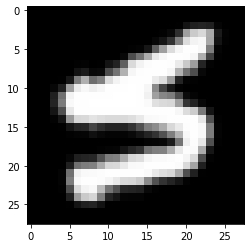

In [171]:
print("Label entry 42:", label_dictionary[sample_label])
plt.imshow(sample_image.values.reshape(W, H), cmap=plt.cm.gray)
plt.show()

Label entry 42: N


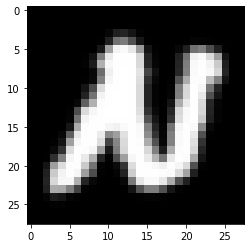

In [172]:
def reshape_and_rotate(image):
    W = 28
    H = 28
    image = image.reshape(W, H)
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

print("Label entry 42:", label_dictionary[sample_label])
plt.imshow(reshape_and_rotate(sample_image.values), cmap=plt.cm.gray)
plt.show()

Next we want to apply reshape_and_rotate to all images in X_train

In [173]:
# note: np.apply_along_axis returns a numpy array, X_train is not a pandas.DataFrame anymore
X_train = np.apply_along_axis(reshape_and_rotate, 1, X_train.values)
X_train.shape

(112800, 28, 28)

## Visualize more sample

Label entry 42: N


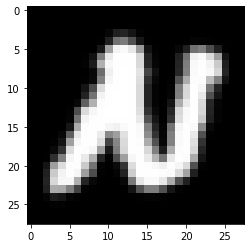

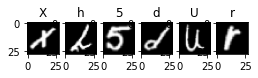

In [174]:
sample_image = X_train[42]
sample_label = y_train.iloc[42]
print("Label entry 42:", label_dictionary[sample_label])
plt.imshow(sample_image.reshape(W, H), cmap=plt.cm.gray)
plt.show()


for i in range(100, 106):
    plt.subplot(390 + (i+1))
    plt.imshow(X_train[i], cmap=plt.cm.gray)
    plt.title(label_dictionary[y_train[i]])

Looks good

### Normalize Data

In [175]:
X_train = X_train.astype('float32') / 255

### One Hot Encode Label

In [176]:
number_of_classes = y_train.nunique()
number_of_classes

47

In [177]:
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_train.shape

(112800, 47)

In [178]:
y_train

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [179]:
# Reshape to fit model input shape
# Tensorflow (batch, width, height, channels)
X_train = X_train.reshape(-1, W, H, 1)
X_train.shape

(112800, 28, 28, 1)

In [180]:
# Split 10% validation 
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  y_train, 
                                                  test_size= 0.1, 
                                                  random_state=88)

### Define model

In [181]:
# Define the model
model = Sequential()

# Reshape input data to fit LSTM
model.add(layers.Reshape((W, H), input_shape=(W, H, 1)))

# BiLSTM layer
model.add(layers.Bidirectional(layers.LSTM(64)))

# Dense layers
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(number_of_classes, activation='softmax'))

# Print model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_4 (Reshape)          (None, 28, 28)            0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 128)               47616     
_________________________________________________________________
dense_12 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_13 (Dense)             (None, 84)                21588     
_________________________________________________________________
dense_14 (Dense)             (None, 47)                3995      
Total params: 106,223
Trainable params: 106,223
Non-trainable params: 0
_________________________________________________________________


In [182]:
optimizer_name = 'Adam'

model.compile(loss='categorical_crossentropy', optimizer=optimizer_name, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
mcp_save = ModelCheckpoint('my_model.h5', save_best_only=True, monitor='val_loss', verbose=1, mode='auto')

In [183]:
history = model.fit(X_train,
                    y_train, 
                    epochs=30, 
                    batch_size=32, 
                    verbose=1, 
                    validation_split=0.1,
                    callbacks=[early_stopping, mcp_save])

Epoch 1/30
2856/2856 [==============================] - 19s 6ms/step - loss: 1.6015 - accuracy: 0.5361 - val_loss: 0.5897 - val_accuracy: 0.8062

Epoch 00001: val_loss improved from inf to 0.58972, saving model to my_model.h5
Epoch 2/30
2856/2856 [==============================] - 15s 5ms/step - loss: 0.5593 - accuracy: 0.8078 - val_loss: 0.4900 - val_accuracy: 0.8333

Epoch 00002: val_loss improved from 0.58972 to 0.48995, saving model to my_model.h5
Epoch 3/30
2856/2856 [==============================] - 16s 5ms/step - loss: 0.4548 - accuracy: 0.8387 - val_loss: 0.4581 - val_accuracy: 0.8462

Epoch 00003: val_loss improved from 0.48995 to 0.45813, saving model to my_model.h5
Epoch 4/30
2856/2856 [==============================] - 15s 5ms/step - loss: 0.4050 - accuracy: 0.8541 - val_loss: 0.4085 - val_accuracy: 0.8581

Epoch 00004: val_loss improved from 0.45813 to 0.40854, saving model to my_model.h5
Epoch 5/30
2856/2856 [==============================] - 15s 5ms/step - loss: 0.3733 

In [184]:
# plot accuracy and loss
def plotgraph(epochs, acc, val_acc):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

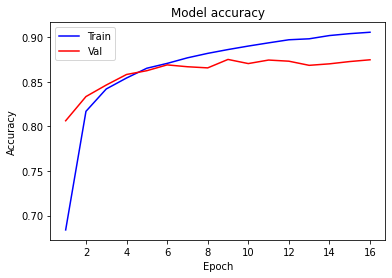

In [185]:
# Accuracy curve
plotgraph(epochs, acc, val_acc)

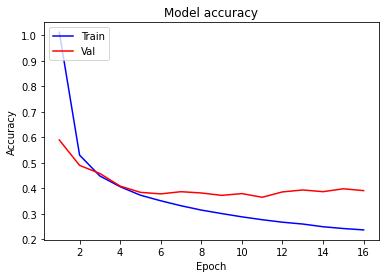

In [186]:
# loss curve
plotgraph(epochs, loss, val_loss)

### Test model

In [187]:
# Load best model
model = load_model('/kaggle/working/my_model.h5')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_4 (Reshape)          (None, 28, 28)            0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 128)               47616     
_________________________________________________________________
dense_12 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_13 (Dense)             (None, 84)                21588     
_________________________________________________________________
dense_14 (Dense)             (None, 47)                3995      
Total params: 106,223
Trainable params: 106,223
Non-trainable params: 0
_________________________________________________________________


In [188]:
y_pred = model.predict(X_val)
y_pred.shape

(11280, 47)

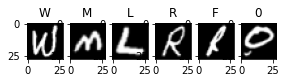

In [189]:
for i in range(10, 16):
    plt.subplot(380 + (i%10+1))
    plt.imshow(X_val[i].reshape(28, 28), cmap=plt.cm.gray)
    plt.title(label_dictionary[y_pred[i].argmax()])

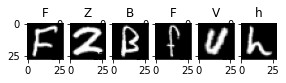

In [190]:
for i in range(42, 48):
    plt.subplot(380 + (i%10+1))
    plt.imshow(X_val[i].reshape(28, 28), cmap=plt.cm.gray)
    plt.title(label_dictionary[y_pred[i].argmax()])

#### Test accuracy

In [191]:
model.evaluate(X_val, y_val)

353/353 [==============================] - 2s 3ms/step - loss: 0.4005 - accuracy: 0.8598


[0.40053898096084595, 0.8597517609596252]

### Load test dataset & preprocess image like how we did to train dataset

In [192]:
test_df = pd.read_csv('/kaggle/input/emnist/emnist-balanced-test.csv', header=None)
test_df.shape

(18800, 785)

In [193]:
test_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,18800.000000,18800.0,18800.0,18800.0,18800.0,18800.000000,18800.000000,18800.000000,18800.000000,18800.000000,...,18800.0,18800.0,18800.0,18800.0,18800.0,18800.0,18800.0,18800.0,18800.0,18800.0
mean,23.000000,0.0,0.0,0.0,0.0,0.006064,0.019734,0.011277,0.009362,0.011277,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,13.565021,0.0,0.0,0.0,0.0,0.528828,1.761298,1.054441,0.892318,1.517275,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,11.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,23.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,35.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,46.000000,0.0,0.0,0.0,0.0,63.000000,213.000000,108.000000,95.000000,208.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [194]:
X_test = test_df.loc[:, 1:]
y_test = test_df.loc[:, 0]

X_test.shape, y_test.shape

((18800, 784), (18800,))

In [195]:
X_test = np.apply_along_axis(reshape_and_rotate, 1, X_test.values)
y_test = np_utils.to_categorical(y_test, number_of_classes)

X_test.shape, y_test.shape

((18800, 28, 28), (18800, 47))

In [196]:
X_test = X_test.astype('float32') / 255

In [197]:
X_test = X_test.reshape(-1, W, H, 1)
X_test.shape

(18800, 28, 28, 1)

In [198]:
model.evaluate(X_test, y_test)

588/588 [==============================] - 2s 3ms/step - loss: 0.4009 - accuracy: 0.8635


[0.40088969469070435, 0.863457441329956]